In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df_orders = pd.read_csv('EDA_test_orders_new.csv', sep=',')
df_orders.head()


,order_seller_id,order_id,order_created_at,payment_date,order_status,seller_id,total_item_quantity
0,86329-1425,86329,2022-01-01 09:50:43,2022-01-01 09:50:43,completed,1425,2.0
1,86331-2537,86331,2022-01-01 15:40:13,2022-01-01 15:40:13,completed,2537,1.0
2,86332-75,86332,2022-01-02 08:45:17,2022-01-02 08:45:17,completed,75,1.0
3,86341-1724,86341,2022-01-02 22:56:28,2022-01-02 22:56:28,completed,1724,1.0
4,86527-1955,86527,2022-01-04 03:42:43,NaN,pending,1955,1.0


In [3]:
#Condiciones de ordenes satisfactorias

df_orders = df_orders[df_orders['payment_date'].notna()]
df_orders = df_orders[df_orders['order_status'] != 'cancelled']
df_orders = df_orders[df_orders['order_status'] != 'trash']
df_orders = df_orders[df_orders['seller_id'] != 2119]
def create_date(row):
    date = row['order_created_at']
    if isinstance(date, str):
        date = row['order_created_at']
        date = date.replace("Z", "")
        date = date.replace("T", " ")
        return(date)
    else:
        return('NULL')
def payment_date(row):
    date = row['payment_date']
    if isinstance(date, str):
        date = row['payment_date']
        date = date.replace("Z", "")
        date = date.replace("T", " ")
        #date_split = date.split('T', 1)
        return(date)
    else:
        return('NULL')
def seller_id(row):
    seller_id = row['seller_id']
    seller_id = int(seller_id)
    return(seller_id)
df_orders['order_created_at'] = df_orders.apply(create_date, axis=1)
df_orders['payment_date'] = df_orders.apply(payment_date, axis=1)
df_orders['seller_id'] = df_orders.apply(seller_id, axis=1)
df_orders['order_created_at']= pd.to_datetime(df_orders['order_created_at'])
df_orders['payment_date']= pd.to_datetime(df_orders['payment_date'])
df_orders.shape
mask = (df_orders['payment_date'] >= '2022-01-01 00:00:01') & (df_orders['payment_date'] <= '2022-01-15 23:59:59')
df_orders=df_orders.loc[mask]

hay un total de 52 ordenes satisfactorias


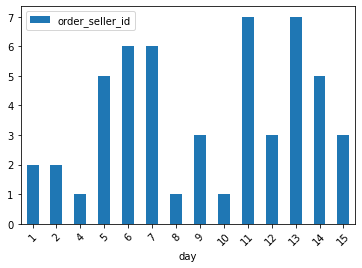

In [4]:
#grafica para ordenes satisfactorias por día
df_orders['date_only'] = df_orders['payment_date'].dt.date
plot_succesful_orders = df_orders.groupby('date_only').count()['order_seller_id'].to_frame().reset_index()
plot_succesful_orders['day'] = pd.DatetimeIndex(plot_succesful_orders['date_only']).day
plot_succesful_orders
plot_succesful_orders.plot.bar(x='day', y='order_seller_id', rot=45);
plot_succesful_orders.head()
total = plot_succesful_orders['order_seller_id'].sum()
print(f'hay un total de {total} ordenes satisfactorias')
